In [5]:
import talib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cols_names = ['unix_time', 'open', 'high', 'low', 'close', 'volume', 'unix_close_time', 'Quote asset volume','Number_of_trades', 'base asset volume', 'Taker buy quote asset volume','Ignore']

# df = pd.read_csv('NEOBUSD_4h_1 year ago UTC.csv', names= cols_names)

# cols_names = ['unix','date','symbol','open','high','low','close','VolumeBTC','VolumeUSDT','tradecount']

df = pd.read_csv('BTCBUSD_1d_499 days ago UTC.csv', names= cols_names, keep_date_col = True)





In [9]:
df

,unix_time,open,high,low,close,volume,unix_close_time,Quote asset volume,Number_of_trades,base asset volume,Taker buy quote asset volume,Ignore,macd,macdsignal,macdhist,rsi,prediction
0,2019-09-19,9881.43,10305.58,9828.59,10254.92,1.051048,1568937599999,1.060699e+04,112,0.602634,6.096570e+03,0,NaN,NaN,NaN,NaN,0.0
1,2019-09-20,10214.31,10233.53,10078.91,10171.06,6.916184,1569023999999,7.021372e+04,196,0.916205,9.329242e+03,0,NaN,NaN,NaN,NaN,0.0
2,2019-09-21,10169.44,10169.44,9940.27,9998.87,3.053031,1569110399999,3.048605e+04,72,1.856794,1.854052e+04,0,NaN,NaN,NaN,NaN,0.0
3,2019-09-22,9928.07,10050.12,9874.30,10010.53,1.797653,1569196799999,1.785481e+04,57,1.528856,1.516204e+04,0,NaN,NaN,NaN,NaN,0.0
4,2019-09-23,10037.70,10037.70,9612.75,9706.93,28.145778,1569283199999,2.749258e+05,669,4.570708,4.488572e+04,0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,2022-02-02,38715.14,38877.07,36600.10,36919.33,11855.281200,1643846399999,4.479841e+08,370096,5601.223330,2.116497e+08,0,-1761.180745,-2074.821765,313.641020,40.877995,0.0
868,2022-02-03,36924.99,37388.91,36256.80,37330.03,11209.111920,1643932799999,4.120953e+08,353525,5588.307340,2.054582e+08,0,-1695.402496,-1998.937911,303.535416,41.338984,0.0
869,2022-02-04,37330.02,41800.61,37036.66,41593.87,20505.693920,1644019199999,8.007590e+08,516303,10150.141650,3.964163e+08,0,-1284.410620,-1856.032453,571.621833,45.814793,0.0
870,2022-02-05,41595.09,41938.74,40968.10,41403.93,10335.865750,1644105599999,4.292485e+08,354028,4732.528240,1.964925e+08,0,-962.923188,-1677.410600,714.487412,45.656445,0.0


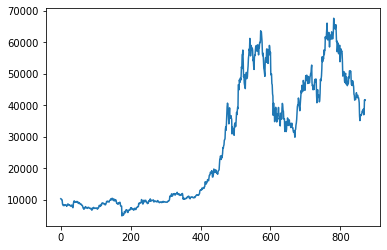

In [3]:
df['close'].plot()

In [6]:
df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
df['rsi'] = talib.RSI(df['close'].values,50)

upperband, middleband, lowerband = talib.BBANDS(df['close'].values, 100, 1, 1)


In [15]:
df["prediction"] = np.nan

def get_predictions(df):
    for index, row in df.iterrows():

        prediction_value = 0

        if row['rsi']>40 and row['macdhist']>0 and df.loc[index-1, 'macdhist']<0 and df.loc[index-2, 'macdhist']<0 and df.loc[index-3, 'macdhist']<0:
            prediction_value = 1

        if row['rsi']<60 and row['macdhist']<0 and df.loc[index-1, 'macdhist']>0 and df.loc[index-2, 'macdhist']>0 and df.loc[index-3, 'macdhist']>0:
            prediction_value = -1

        df.at[index,'prediction'] = prediction_value

        df['unix_time'] = pd.to_datetime(df['unix_time'], unit='s')

        # Ошибка появляется только если раскомментить эту строчку
        ###########################################
        #df.set_index('unix_time', inplace=True)
        ###########################################
        
    return  df[['unix_time', 'prediction']]

 

new_df = get_predictions(df)


In [16]:
new_df

,unix_time,prediction
0,2019-09-19,0.0
1,2019-09-20,0.0
2,2019-09-21,0.0
3,2019-09-22,0.0
4,2019-09-23,0.0
...,...,...
867,2022-02-02,0.0
868,2022-02-03,0.0
869,2022-02-04,0.0
870,2022-02-05,0.0


In [18]:
new_df.to_csv('file.csv')

In [65]:
# plt.plot(upperband)
# plt.plot(middleband)
# plt.plot(lowerband)
# plt.plot(df['close'].values)